<a href="https://colab.research.google.com/github/ekramasif/Basic-Machine-Learning/blob/main/NLP/IMDB_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import yellowbrick
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import random
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
# Read the IMDB dataset
imdb_df = pd.read_csv('IMDB Dataset.csv')

imdb_df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Split the dataset into training and test set
imdb_train_df = imdb_df.iloc[:40000]
imdb_test_df = imdb_df.iloc[10000:]

(None, None)

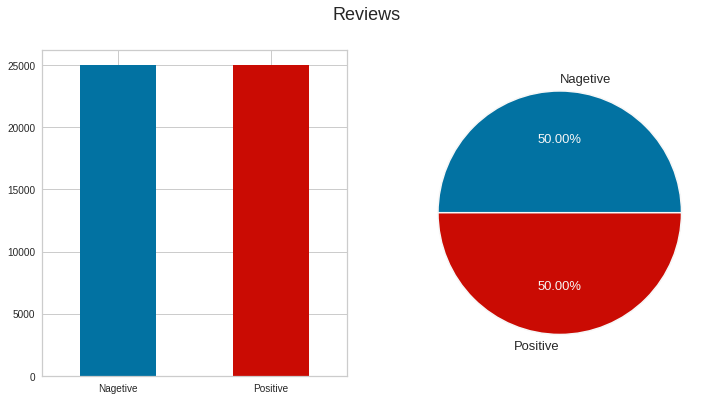

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Reviews", fontsize = 18.)
_ = imdb_df.sentiment.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Nagetive", "Positive"])
_ = imdb_df.sentiment.value_counts().plot.pie(labels = ("Nagetive", "Positive"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [ ]:
# Storing in "before_process" a random example of review before preprocessing
# Defining and applying the function "process" performing the transformations of the reviews
# Storing in "after_process" the example of review after preprocessing
import random
idx = random.randint(0, len(imdb_df)-1)
before_process = imdb_df.iloc[idx][0]

def process(x):
    x = re.sub('[,\.!?:()"]', '', x) 
    x = re.sub('<.*?>', ' ', x) # Eliminate HTML tag
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x) # Eliminate duplicate whitespaces using wildcards
    return x.lower().strip()

imdb_train_df['review'] = imdb_train_df['review'].apply(lambda x: process(x))
after_process = imdb_df.iloc[idx][0]

<ipython-input-158-1eab18990461>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_train_df['review'] = imdb_train_df['review'].apply(lambda x: process(x))


In [ ]:
# 2: Pre-processing the text, you can choose whether you need stemming, removing stop words, removing non-alphabetical words.

import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

# Create tokenizer and stopwords
tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Pre-processing the training set
processed_data = []
for sentence in imdb_train_df['review']:
    words = tokenizer.tokenize(sentence.lower())
    words = [word for word in words if word not in stop_words]
    processed_data.append(words)

In [ ]:
# 3: Analysing the feature of the training set, report the linguistic features of the training dataset.

import collections

# Create a dictionary to count the frequency of each word
word_frequency = collections.defaultdict(int)
for sentence in processed_data:
    for word in sentence:
        word_frequency[word] += 1

# Calculate the average length of the sentences
sentence_lengths = []
for sentence in processed_data:
    sentence_lengths.append(len(sentence))
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)


# Report the linguistic features
print("The average sentence length is", average_sentence_length)
print("The most common words are:")
for word, frequency in sorted(word_frequency.items(), key=lambda item: item[1], reverse=True)[:10]:
    print(word, frequency)

The average sentence length is 119.273625
The most common words are:
movie 69954
film 63242
one 42504
like 31894
good 23840
time 19939
even 19815
would 19776
really 18358
story 18338


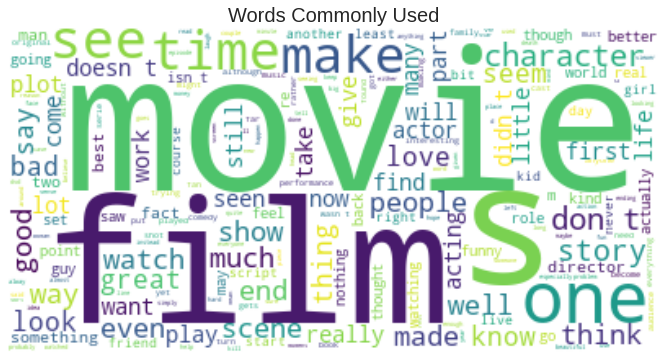

In [ ]:
x = " ".join([twts for twts in imdb_train_df["review"]])
wordCloud = WordCloud(background_color="white",mode="RGBA",random_state=4,max_font_size=119).generate(x)
plt.figure(1, figsize=(15, 6))
plt.title(f"Words Commonly Used", size=20)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# 4: Build a text classification model, train your model on the training set and test your model on the test set.However, you are not allowed to use the Naïve Bayes algorithm and VADER classifier.

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer and train the model
vectorizer = TfidfVectorizer(min_df=2)
X_train = vectorizer.fit_transform(imdb_train_df['review'])
y_train = imdb_train_df['sentiment']


In [ ]:
# creating a Random Forest Model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50,criterion='entropy')
hist = model.fit(X_train,y_train)

In [ ]:
# Test the model
X_test = vectorizer.transform(imdb_test_df['review'])
y_test = imdb_test_df['sentiment']

In [ ]:
# 5: Summarize the performance of your model (You can gain additional marks if you have some graph visualization).

from sklearn.metrics import accuracy_score

# Make predictions
predictions = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)

In [ ]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
# print(cm)

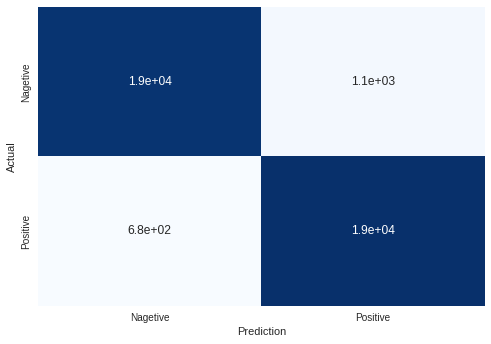

In [ ]:
ax = sns.heatmap(cm, annot=True, xticklabels=["Nagetive", "Positive"], yticklabels=["Nagetive", "Positive"],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

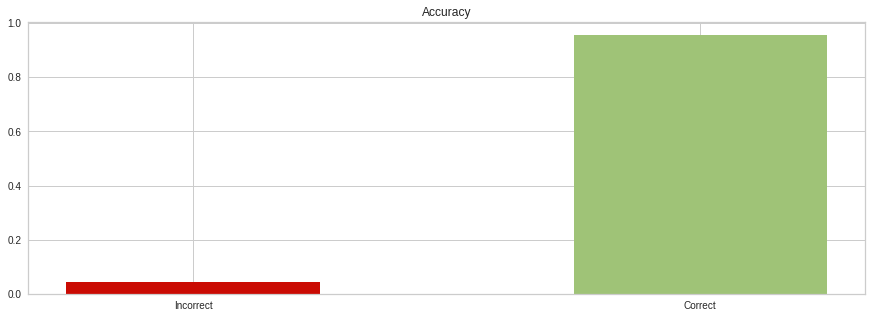

In [ ]:
plt.figure(figsize=(15,5))
plt.bar([0, 1], [1-accuracy, accuracy], color=['r', 'g'], width=0.5)
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.title('Accuracy')
plt.show()

In [ ]:
# --- Random Forest Accuracy ---
RFAcc = accuracy_score(y_test,y_predicted)
print('.:. Random Forest Accuracy:'+'\033[1m {:.2f}%'.format(RFAcc*100)+' .:.')

# --- Random FOrest Classification Report ---
print('\n\033[1m'+'.: Classification Report'+'\033[0m')
print('*' * 25)
print(classification_report(y_test,y_predicted))

.:. Random Forest Accuracy: 95.62% .:.

.: Classification Report
*************************
              precision    recall  f1-score   support

    negative       0.97      0.95      0.96     20028
    positive       0.95      0.97      0.96     19972

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



## 1. One way to improve the model is to try different classification algorithms and see which one performs the best.
## 2. Another way is to tune the hyperparameters of the chosen algorithm using cross-validation.
## 3. Additionally, we can try using more advanced techniques such as word embeddings and deep learning models.